In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text

## Load Dataset

Load and aggregate data into number of road accidents by **season**.


In [2]:
url = "https://raw.githubusercontent.com/anw-g01/dataviz-anw/refs/heads/main/road_safety_open_data_2016/data/road_accidents.csv"

df = pd.read_csv(url, parse_dates=["date_time"], date_format="%Y-%m-%d %H:%M:%S")

# aggreagte road_accidents to find the no. of accidents per season
df = (
    df.drop_duplicates(subset=["index"])
    .groupby("season")
    .size()
    .reset_index(name="num_accidents")
    .sort_values(by="season")
)

df

,season,num_accidents
0,Autumn,35938
1,Spring,32909
2,Summer,34284
3,Winter,33490


## Bar Chart - Number of Accidents by Season

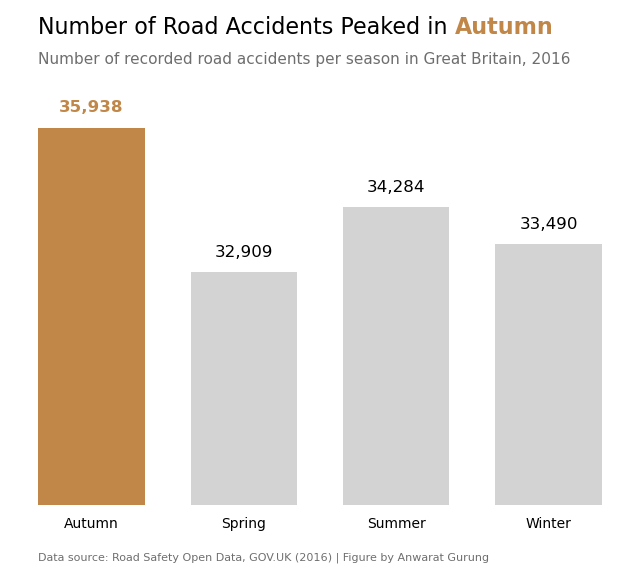

In [36]:
# choose a colour palette
cmap = load_cmap("AsteroidCity1")
colours = cmap.colors

# to highlight the season with the most accidents
highlight_colour = colours[4]    # chosen highlight colour (for this chart)
max_season = df.loc[df["num_accidents"].idxmax(), "season"]    # season with the most accidents
colours_df6 = (df["season"] == max_season).map({
    True: highlight_colour,
    False: "lightgrey"    # all other bars grey
})

# create chart figure
fig, ax = plt.subplots(figsize=(8, 6))

# plot bar graph
ax.bar(
    df["season"],
    df["num_accidents"],
    color=colours_df6,
    width=0.7
)

# customisation
ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
ax.tick_params(axis="x", length=0, pad=8)    # spacing of x ticks (labels) from x-axis
ax.set_yticks([])
ax.set_ylim([28000, None])

# y-value annotations
for i in range(df.shape[0]):
    season, value = df["season"].iloc[i], df["num_accidents"].iloc[i]
    ax.text(
        x=i,
        y=value * 1.008,
        s=f"{value:,}",    # text to display
        va="bottom",
        ha="center",
        weight="bold" if season == max_season else None,
        color=highlight_colour if season == max_season else "black",
        fontsize=12
    )

# chart title
x_value, y_value = 0.16, 0.9    # starting location of title text in figure coordinates
fig_text(
    x=x_value, y=y_value * 1.03,
    s=f"Number of Road Accidents Peaked in <{max_season}>",
    highlight_textprops=[
        {"color": highlight_colour, "weight": "bold"},
    ],
    fontsize=16
)

# chart subtitle
fig.text(
    x=x_value, y=y_value * 0.94,
    s="Number of recorded road accidents per season in Great Britain, 2016",
    size=11,
    color="#6e6e6e"
)

# chart caption
fig.text(
    x_value, 0.015,
    "Data source: Road Safety Open Data, GOV.UK (2016) | Figure by Anwarat Gurung",
    ha="left",
    va="bottom",
    fontsize=8,
    color="#6e6e6e",
)

# save figure as an image file
plt.savefig("../images/accidents_by_season_bar_chart.png", dpi=200, bbox_inches="tight")

plt.show()